# Extract labels from the EmoEvaluation files

Audio files are located in ```sentences/wav/```

Text transcripts are located in ```dialog/transcriptions/```

Label files are located in ```dialog/EmoEvaluation/*.txt```

### Test

In [86]:
import re

useful_regex = re.compile(r'\[.+\]\n', re.IGNORECASE)

file_path = '../data/IEMOCAP_full_release/Session1/dialog/EmoEvaluation/Ses01F_impro01.txt'

with open(file_path) as f:
    file_content = f.read()
    
info_lines = re.findall(useful_regex, file_content)

for l in info_lines[1:10]:
    print(l.strip().split('\t'))

['[6.2901 - 8.2357]', 'Ses01F_impro01_F000', 'neu', '[2.5000, 2.5000, 2.5000]']
['[10.0100 - 11.3925]', 'Ses01F_impro01_F001', 'neu', '[2.5000, 2.5000, 2.5000]']
['[14.8872 - 18.0175]', 'Ses01F_impro01_F002', 'neu', '[2.5000, 2.5000, 2.5000]']
['[19.2900 - 20.7875]', 'Ses01F_impro01_F003', 'xxx', '[2.5000, 3.0000, 3.0000]']
['[21.3257 - 24.7400]', 'Ses01F_impro01_F004', 'xxx', '[2.5000, 3.0000, 2.5000]']
['[27.4600 - 31.4900]', 'Ses01F_impro01_F005', 'neu', '[2.5000, 3.5000, 2.0000]']
['[38.9650 - 43.5900]', 'Ses01F_impro01_F006', 'fru', '[2.0000, 3.5000, 3.5000]']
['[46.5800 - 52.1900]', 'Ses01F_impro01_F007', 'fru', '[2.5000, 3.5000, 3.5000]']
['[56.1600 - 58.8225]', 'Ses01F_impro01_F008', 'fru', '[2.0000, 3.5000, 3.5000]']


# Compile all the information in a single file
Parse emotion labels

In [87]:
import os, re
from pathlib import Path
import pandas as pd

BASE = '../data/IEMOCAP_full_release'
sessions = [s for s in os.listdir(BASE) if s.lower().startswith('session')]

HEAD_RE = re.compile(
    r'^\[(\d+\.\d+)\s*-\s*(\d+\.\d+)\]\s+(\S+)\s+([A-Za-z]{3})\s*\[\s*([\d\.\s,]+)\s*\]\s*$'
)

def read_text_robust(p: Path) -> str:
    """Try several encodings; fall back to ignoring errors."""
    for enc in ('utf-8', 'utf-8-sig', 'cp1252', 'latin-1'):
        try:
            with open(p, 'r', encoding=enc) as f:
                return f.read()
        except UnicodeDecodeError:
            continue
    # last resort
    with open(p, 'r', encoding='utf-8', errors='ignore') as f:
        return f.read()

label_rows = []
for S in sessions:
    emo_dir = Path(BASE, S, 'dialog', 'EmoEvaluation')
    if not emo_dir.is_dir():
        continue
    for emo_file in emo_dir.glob('*.txt'):
        content = read_text_robust(emo_file)
        for line in content.splitlines():
            m = HEAD_RE.match(line.strip())
            if m:
                start, end, utt, lab, vad = m.groups()
                label_rows.append({
                    'session': S,
                    'utter_id': utt,
                    'label_raw': lab.lower(),
                    't_start': float(start),
                    't_end': float(end),
                    'vad': vad,
                    'emo_file': str(emo_file)
                })

labels_df = pd.DataFrame(label_rows)
print('labels parsed:', len(labels_df))
labels_df.head(15)


labels parsed: 10039


,session,utter_id,label_raw,t_start,t_end,vad,emo_file
0,Session3,Ses03F_impro07_F000,xxx,7.2915,9.6563,"4.0000, 2.0000, 2.0000",../data/IEMOCAP_full_release/Session3/dialog/E...
1,Session3,Ses03F_impro07_F001,hap,10.4226,13.5866,"4.0000, 2.0000, 2.5000",../data/IEMOCAP_full_release/Session3/dialog/E...
2,Session3,Ses03F_impro07_F002,xxx,14.3749,15.5682,"3.5000, 3.0000, 2.5000",../data/IEMOCAP_full_release/Session3/dialog/E...
3,Session3,Ses03F_impro07_F003,sur,16.3565,20.2650,"4.0000, 3.5000, 2.5000",../data/IEMOCAP_full_release/Session3/dialog/E...
4,Session3,Ses03F_impro07_F004,hap,24.6223,27.0419,"4.0000, 3.0000, 3.0000",../data/IEMOCAP_full_release/Session3/dialog/E...
5,Session3,Ses03F_impro07_F005,hap,27.1514,30.9950,"4.0000, 3.5000, 2.5000",../data/IEMOCAP_full_release/Session3/dialog/E...
6,Session3,Ses03F_impro07_F006,xxx,32.4612,37.2017,"4.0000, 2.5000, 2.5000",../data/IEMOCAP_full_release/Session3/dialog/E...
7,Session3,Ses03F_impro07_F007,exc,40.4095,44.5589,"4.5000, 3.5000, 2.5000",../data/IEMOCAP_full_release/Session3/dialog/E...
8,Session3,Ses03F_impro07_F008,exc,45.8836,49.4527,"4.5000, 3.5000, 3.0000",../data/IEMOCAP_full_release/Session3/dialog/E...
9,Session3,Ses03F_impro07_F009,exc,49.4855,61.4190,"4.0000, 3.5000, 2.5000",../data/IEMOCAP_full_release/Session3/dialog/E...


### View original abbreviation distribution, perform category selection based on frequency

In [88]:
labels_df['label_raw'].value_counts().sort_values(ascending=False)

label_raw
xxx    2507
fru    1849
neu    1708
ang    1103
sad    1084
exc    1041
hap     595
sur     107
fea      40
oth       3
dis       2
Name: count, dtype: int64

Select 6 categories

In [89]:
keep6 = {'ang','hap','sad','neu','fru','exc'}
labels6 = labels_df[labels_df['label_raw'].isin(keep6)].copy()

name_map6 = {'ang':'angry','hap':'happy','sad':'sad','neu':'neutral','fru':'frustration','exc':'excited'}
labels6['label'] = labels6['label_raw'].map(name_map6)

labels6['label'].value_counts()

label
frustration    1849
neutral        1708
angry          1103
sad            1084
excited        1041
happy           595
Name: count, dtype: int64

### Align audio + text + label

In [90]:
from glob import glob

def uid_from_stem(stem: str):
    # Extract the utterance ID, e.g. "Ses01F_impro01_F000"
    m = re.search(r'(Ses\d{2}[MF]_[A-Za-z]+\d+_[MF]\d{3,4})', stem)
    return m.group(1) if m else None

def dialog_id_from_uid(uid: str):
    # Convert an utterance ID back to its dialog ID
    # Example: "Ses01F_impro01_F000" -> "Ses01F_impro01"
    m = re.match(r'^(Ses\d{2}[MF]_[A-Za-z]+\d+)_', uid)
    return m.group(1) if m else None

def clean_transcript_line(line: str) -> str:
    # Remove utterance ID and timestamps from the line
    line = re.sub(r'^Ses\d{2}[MF]_[A-Za-z]+\d+_[MF]\d{3,4}\s*\[.*?\]\s*:\s*', '', line)
    # Clean noise and special tags such as <sil>, <noise>, etc.
    line = re.sub(r'</?s>', ' ', line, flags=re.I)
    line = re.sub(r'<\s*(sil|sp|noise|laughter)\s*>', ' ', line, flags=re.I)
    line = re.sub(r'\(\d+\)', ' ', line)     
    line = re.sub(r'<[^>]+>', ' ', line)
    return re.sub(r'\s+', ' ', line).strip()

def text_from_transcript_file(path: str, utter_id: str) -> str | None:
    # Extract the matching utterance text from the transcript file
    pat = re.compile(rf'^{re.escape(utter_id)}\b')
    with open(path, 'r', encoding='utf-8', errors='ignore') as f:
        for raw in f:
            if pat.search(raw):
                return clean_transcript_line(raw)
    return None

def wdseg_to_text(path: str) -> str:
    # Convert forced-alignment (.wdseg) file into plain text (used as backup)
    sent = []
    with open(path, 'r', encoding='utf-8', errors='ignore') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 3:
                w = parts[-1].lower()
                if w in {'sil','sp','garbage','<sil>','</s>','<s>'}:
                    continue
                w = re.sub(r'[{}<>]', '', w)
                if w:
                    sent.append(w)
    return ' '.join(sent)

# ---------- Build the global index ----------
rows = []
sessions = sorted([s for s in os.listdir(BASE) if s.lower().startswith('session')],
                  key=lambda x: int(re.search(r'\d+', x).group()))
for S in sessions:
    Sdir = Path(BASE, S)

    # Sentence-level audio (.wav)
    wavs = [Path(p) for p in glob(str(Sdir/'sentences'/'**'/'*.wav'), recursive=True)]
    wav_map = {uid_from_stem(p.stem): str(p) for p in wavs if uid_from_stem(p.stem)}

    # Sentence-level forced alignment (.wdseg)
    wdsegs = [Path(p) for p in glob(str(Sdir/'sentences'/'ForcedAlignment'/'**'/'*.wdseg'), recursive=True)]
    wdseg_map = {uid_from_stem(p.stem): str(p) for p in wdsegs if uid_from_stem(p.stem)}

    # Dialog-level transcripts (.txt) mapped by dialog ID
    dial_txts = [Path(p) for p in glob(str(Sdir/'dialog'/'transcriptions'/'**'/'*.txt'), recursive=True)]
    txt_map = {p.stem: str(p) for p in dial_txts}

    # Combine all available paths for each utterance
    for uid in sorted(set(wav_map) | set(wdseg_map)):
        did = dialog_id_from_uid(uid)
        rows.append({
            'session': S,
            'utter_id': uid,
            'audio_path': wav_map.get(uid),
            'wdseg_path': wdseg_map.get(uid),
            'transcript_path': txt_map.get(did) if did else None,
        })

index_df = pd.DataFrame(rows)

# labels6 - Merge with labels (6 emotion classes)
merged = index_df.merge(labels6[['session','utter_id','label']], on=['session','utter_id'], how='inner')

# Select transcript text or fallback to wdseg
def pick_text(row):
    # Prefer transcript text if available
    if pd.notna(row['transcript_path']):
        txt = text_from_transcript_file(row['transcript_path'], row['utter_id'])
        if txt:
            return txt
    # Backup: use word-segmented forced alignment
    if pd.notna(row['wdseg_path']):
        return wdseg_to_text(row['wdseg_path'])
    return None

# Apply text extraction for all utterances
merged['text'] = merged.apply(pick_text, axis=1)

# Keep only samples with both audio and text
final_df = merged[(merged['audio_path'].notna()) & (merged['text'].notna())].copy()
final_df = final_df.sort_values(['session','utter_id']).reset_index(drop=True)

# 1) 统一把路径绝对化（方便任何位置运行脚本）
for col in ['audio_path', 'wdseg_path', 'transcript_path']:
    final_df[col] = final_df[col].apply(lambda p: str(Path(p).resolve()) if pd.notna(p) else p)

print(f"Total aligned samples (Text + Audio + Label): {len(final_df)}")
print("\nSample preview:")
print(final_df[['utter_id','session','audio_path','text','label']].head(10))

Total aligned samples (Text + Audio + Label): 3694

Sample preview:
              utter_id   session  \
0  Ses01F_impro01_F000  Session1   
1  Ses01F_impro01_F001  Session1   
2  Ses01F_impro01_F002  Session1   
3  Ses01F_impro01_F005  Session1   
4  Ses01F_impro01_F006  Session1   
5  Ses01F_impro01_F007  Session1   
6  Ses01F_impro01_F008  Session1   
7  Ses01F_impro01_F009  Session1   
8  Ses01F_impro01_F011  Session1   
9  Ses01F_impro01_F012  Session1   

                                          audio_path  \
0  /home/xiaoranxie/Documents/HRI/beta_decoder_pr...   
1  /home/xiaoranxie/Documents/HRI/beta_decoder_pr...   
2  /home/xiaoranxie/Documents/HRI/beta_decoder_pr...   
3  /home/xiaoranxie/Documents/HRI/beta_decoder_pr...   
4  /home/xiaoranxie/Documents/HRI/beta_decoder_pr...   
5  /home/xiaoranxie/Documents/HRI/beta_decoder_pr...   
6  /home/xiaoranxie/Documents/HRI/beta_decoder_pr...   
7  /home/xiaoranxie/Documents/HRI/beta_decoder_pr...   
8  /home/xiaoranxie/Documents/H

In [91]:
# Subset of the 6 selected emotion categories
six = labels6[['session','utter_id','label']].copy()

m = six.merge(index_df, on=['session','utter_id'], how='left')

print("Total samples in 6 categories:", len(six))
print("Samples with sentence-level WAVs:", m['audio_path'].notna().sum())
print("Samples with transcript file paths:", m['transcript_path'].notna().sum())
print("Samples with wdseg alignment files:", m['wdseg_path'].notna().sum())

# Identify missing audio or text entries
no_audio = m[m['audio_path'].isna()]
no_text  = merged[merged['text'].isna()]

# Report missing data per emotion
print("\nMissing audio count per label:\n", no_audio['label'].value_counts())
print("\nMissing text count per label:\n", no_text['label'].value_counts())

# Report aligned data per session
print("\nAligned sample count per session:\n", final_df['session'].value_counts())


Total samples in 6 categories: 7380
Samples with sentence-level WAVs: 3694
Samples with transcript file paths: 3694
Samples with wdseg alignment files: 3693

Missing audio count per label:
 label
frustration    948
angry          868
neutral        704
sad            476
excited        379
happy          311
Name: count, dtype: int64

Missing text count per label:
 Series([], Name: count, dtype: int64)

Aligned sample count per session:
 session
Session5    938
Session4    839
Session2    670
Session1    625
Session3    622
Name: count, dtype: int64


### Visualization 1 – Missing Audio Count per Emotion

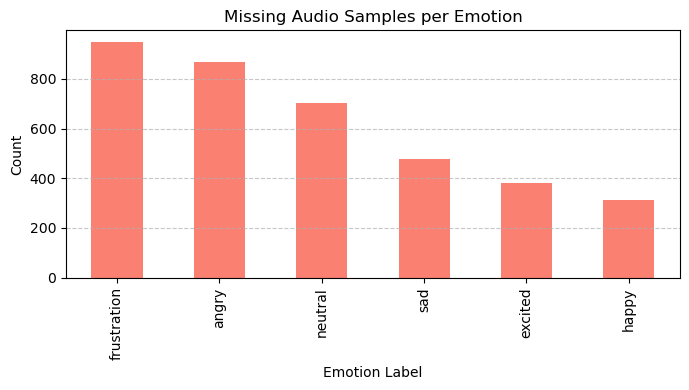

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
no_audio['label'].value_counts().plot(kind='bar', color='salmon')
plt.title("Missing Audio Samples per Emotion")
plt.xlabel("Emotion Label")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This plot quickly highlights which emotion categories lost more audio samples (e.g., frustration or angry).

### Visualization 2 – Aligned Samples per Session

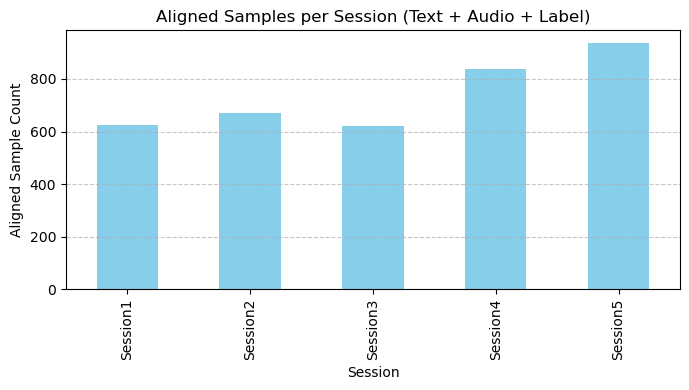

In [93]:
plt.figure(figsize=(7,4))
final_df['session'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Aligned Samples per Session (Text + Audio + Label)")
plt.xlabel("Session")
plt.ylabel("Aligned Sample Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This bar chart gives a clear view of how evenly distributed the final 3694 aligned utterances are across the five sessions.

In [94]:
# Save the clean aligned index (utterance-level information)
final_df[['utter_id','session','audio_path','text','label']].to_csv(
    '../data/iemocap_index.csv', index=False
)

# Split dataset by session to prevent speaker overlap (standard IEMOCAP setup)
# Session 5 → test set
# Session 4 → validation set
# Remaining sessions → training set
split_map = {'Session5': 'test', 'Session4': 'val'}
final_df['split'] = final_df['session'].map(split_map).fillna('train')

# Export the dataset with split information
final_df.to_csv('../data/iemocap_index_splits.csv', index=False)

# Display overall split distribution and label counts within each split
print("Dataset successfully exported.")
print("\nSplit distribution:")
print(final_df['split'].value_counts())

print("\nLabel counts per split:")
print(final_df.groupby(['split','label']).size())


Dataset successfully exported.

Split distribution:
split
train    1917
test      938
val       839
Name: count, dtype: int64

Label counts per split:
split  label      
test   angry           31
       excited        174
       frustration    207
       happy          106
       neutral        287
       sad            133
train  angry          120
       excited        324
       frustration    389
       happy          147
       neutral        543
       sad            394
val    angry           84
       excited        164
       frustration    305
       happy           31
       neutral        174
       sad             81
dtype: int64
